In [298]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
with open("movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)

In [366]:
df = pd.DataFrame(all_movies)
df['production_budget'] = df['production_budget']*1000000
for item in df['imdb_budget']:
    if df['imdb_budget'].item != 0:
        df['budget'] = df['imdb_budget'].item
    else:
        df['budget'] = df['production_budget']
df['ones'] = int(1)
df['budget']


0      <bound method Series.item of 0      220000000\...
1      <bound method Series.item of 0      220000000\...
2      <bound method Series.item of 0      220000000\...
3      <bound method Series.item of 0      220000000\...
4      <bound method Series.item of 0      220000000\...
5      <bound method Series.item of 0      220000000\...
6      <bound method Series.item of 0      220000000\...
7      <bound method Series.item of 0      220000000\...
8      <bound method Series.item of 0      220000000\...
9      <bound method Series.item of 0      220000000\...
10     <bound method Series.item of 0      220000000\...
11     <bound method Series.item of 0      220000000\...
12     <bound method Series.item of 0      220000000\...
13     <bound method Series.item of 0      220000000\...
14     <bound method Series.item of 0      220000000\...
15     <bound method Series.item of 0      220000000\...
16     <bound method Series.item of 0      220000000\...
17     <bound method Series.ite

###Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [338]:
y, X = dmatrices('domestic_gross ~ imdb_budget', data=df, return_type='dataframe')

In [339]:
#X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sun, 12 Jul 2015   Prob (F-statistic):           8.60e-29
Time:                        14:34:29   Log-Likelihood:                -3870.0
No. Observations:                 200   AIC:                             7744.
Df Residuals:                     198   BIC:                             7751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1.475e+07   5.13e+06      2.874      0.004      4.63e+06  2.49e+07
imdb_budget     1.0607      0.081     13.148      0.000         0.902     1.220
==============================================================================
Omnibus:                      123.438   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.709
Skew:                           2.115   Prob(JB):                    1.54e-305
Kurtosis:                      15.270   Cond. No.                     7.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [340]:
X.head()

,Intercept,imdb_budget
0,1,220000000
1,1,250000000
2,1,78000000
3,1,200000000
4,1,180000000


In [344]:
X_prime = np.linspace(X.imdb_budget.min(), imdb_budget.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
y_hat = results.predict(X_prime)

NameError: name 'imdb_budget' is not defined

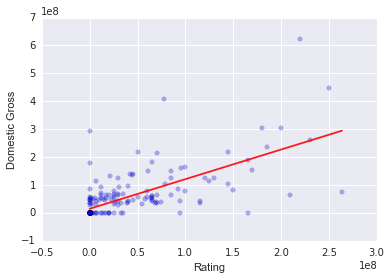

In [343]:
plt.scatter(X.imdb_budget, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Rating")
plt.ylabel("Domestic Gross")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)

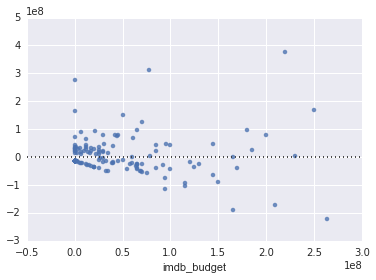

In [345]:
sns.residplot(X.imdb_budget,y)

###Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

###Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

###Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

###Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.